# Uber Global Hackathon: Improving Uber's Service in Barcelona through data analysis of the immigration-emmigration datasets 🚗

![A scenery from Barcelona](https://images.unsplash.com/photo-1464790719320-516ecd75af6c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2670&q=80)
**image source = https://shorturl.at/gklHV**
## 👋 Introduction

Welcome to my Uber Global Hackathon project focused on enhancing Uber's service in Barcelona by leveraging immigration and emigration related datasets. In this project, we will undertake a comprehensive data-driven exploration and analysis of relevant datasets for the city of Barcelona. Our goal is to uncover valuable insights that can lead to improvements in Uber's services tailored specifically for this vibrant and diverse urban center.

### 🎯 Project Objectives

Our project follows a structured approach to achieve its objectives:

1. **Exploratory Data Analysis (EDA)**: We will begin by conducting a thorough exploratory data analysis of the immigration and emigration datasets related to Barcelona. EDA will help us understand the nature of the data, identify patterns, and gain initial insights into the factors that may impact Uber's operations in the city.

2. **Question Formulation**: After gaining a deeper understanding of the data through EDA, we will formulate relevant questions and hypotheses. These questions will guide our analysis and help us focus on specific aspects of the data that are crucial for improving Uber's service.

3. **Data Cleaning**: Data quality is paramount in any analysis. We will perform data cleaning to ensure that our datasets are free from errors, missing values, and inconsistencies. Clean data is essential for reliable and accurate analysis.

4. **Feature Transformation**: To extract meaningful information from the datasets, we may need to transform or engineer features. This step will involve creating new variables or modifying existing ones to enhance the relevance of the data to our analysis.

5. **Data Modeling**: Using the cleaned and transformed data, we will apply various data modeling techniques to answer our formulated questions. This may include statistical analysis, machine learning, and predictive modeling to uncover insights and patterns.

6. **Potential Service Improvements**: Based on our analysis, we will propose potential improvements to Uber's service in Barcelona. These improvements will be data-driven and tailored to address specific challenges and opportunities identified during the analysis.

### ✨ A note on conventions
1. All CSV files in the form of a Pandas dataframe begin with `df_` followed by the name of the file
2. All variables in this jupyter notebook have been written in the snake_case.
3. All functions are written using the camelCase.
4. All classes are written using the PascalCase
### Let's Get Started!



In [ ]:
# importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# importing of datasets
df_nationality  = pd.read_csv("../../CSVs/Barcelona data sets/immigrants_by_nationality.csv")
df_by_age= pd.read_csv("../../CSVs/Barcelona data sets/immigrants_emigrants_by_age.csv")
df_by_destination_1  = pd.read_csv("../../CSVs/Barcelona data sets/immigrants_emigrants_by_destination.csv")
df_by_destination_2  = pd.read_csv("../../CSVs/Barcelona data sets/immigrants_emigrants_by_destination2.csv")
df_by_sex  = pd.read_csv("../../CSVs/Barcelona data sets/immigrants_emigrants_by_sex.csv")
datasets = [df_nationality, df_by_age, df_by_destination_1, df_by_destination_2, df_by_sex]

### Information on datasets (copied directly from the task document)
1. immigrants_by_nationality.csv: This dataset contains information on immigrants in Barcelona,
classified by nationality and neighborhoods, from 2015 to 2017. It allows students to understand the
diversity of the city's immigrant population.

2. immigrants_emigrants_by_age.csv: The dataset provides insights into immigrants and emigrants
categorized by quinquennial ages and neighborhoods for the years 2015 to 2017. Students can analyze
migration patterns and understand age-specific migration trends.

3. immigrants_emigrants_by_destination.csv: This dataset presents information on immigrants and
emigrants, detailing their place of origin and destination, respectively, for the year 2017. Students
can explore migration patterns in and out of Barcelona.

4. immigrants_emigrants_by_destination2.csv: Similar to the previous dataset, this one also includes
neighborhood-wise information on immigrants and emigrants' origin and destination for the year 2017.

5. immigrants_emigrants_by_sex.csv: The dataset records immigrants and emigrants categorized by sex
and neighborhoods from 2013 to 2017. Students can gain insights into gender-specific migration
patterns.

### Viewing head and tail of the dataset

In [ ]:
df_nationality.head()

In [ ]:
df_nationality.tail()

In [ ]:
df_by_destination_1.head()

In [ ]:
df_by_destination_1.tail()

In [ ]:
df_by_destination_2.head()

In [ ]:
df_by_destination_2.tail()

In [ ]:
df_by_age.head()

In [ ]:
df_by_age.tail()

In [ ]:
df_by_sex.head()

In [ ]:
df_by_sex.tail()

### Missing data recognization and imputation

In [ ]:
for dataset in datasets:
    print(dataset.info())

While utilizing the `.info()` function, it became evident that none of the datasets registered any NaN values. However, this observation is somewhat misleading, as some datasets employ placeholders like 'No information' to denote missing data. These placeholders, while not technically NaN values, are functionally equivalent in the context of data visualization and analysis. Detecting and addressing these placeholders manually would be a time-consuming endeavor. Moreover, it remains uncertain whether all instances of missing data have indeed been replaced uniformly with the 'No information' placeholder by the data provider.

Considering these factors, we have decided to defer data imputation for the time being. These categories will become apparent during our data visualization phase, allowing us to handle them appropriately based on their impact on the analysis. This approach helps us avoid unnecessary manual data scrutiny while remaining flexible in addressing missing data scenarios, given the ambiguity surrounding the data source's handling of missing information. Another approach to solving data imputation for now would be to use A.I. tools like "ChatGPT" to recognise these functionally equivalent to NaN values however that too would take a significant amount of time considering the sheer size of this dataset.

### Data visualisation of the nationalities dataset

In [ ]:
df_nationality['District Code'].value_counts()

In [ ]:
df_nationality['District Name'].value_counts()

In [ ]:
# Separate values and frequencies
unique_district = df_nationality['District Name'].value_counts().index
frequencies_district = df_nationality['District Name'].value_counts().values


It is imperative to recognise that the district code of 99 represents that the district the immigrant has migrated to hasn't been recorded. `No consta` is a Spanish translation for the English phrase `Not recorded`. We will now plot data on the basis of district

In [ ]:
def find_percentage(key_list, value_list, decimal_places=2, as_string=False):
    """
    Calculate the percentage values for a list of numeric values and round them to a specified number of decimal places.

    Args:
        key_list (list): A list of keys or labels corresponding to the values.
        value_list (list): A list of numeric values for which percentages will be calculated.
        decimal_places (int, optional): The number of decimal places to round the percentage values to. Default is 2.
        as_string (bool, optional): If True, returns the percentages as strings with '%' sign. Default is False.

    Returns:
        dict or list: If `as_string` is False (default), returns a dictionary where keys are taken from the `key_list`, 
                      and values are the corresponding percentages of the total sum of `value_list` rounded to the specified 
                      decimal places. If `as_string` is True, returns a list of strings where each string represents 
                      a key-value pair as "<key>: <value>%".

    Example:
        key_list = ["A", "B", "C"]
        value_list = [10, 20, 30]
        decimal_places = 2
        as_string = False

        result = find_percentage(key_list, value_list, decimal_places, as_string)

        The result would be: {'A': 16.67, 'B': 33.33, 'C': 50.00}

        key_list = ["A", "B", "C"]
        value_list = [10, 20, 30]
        decimal_places = 2
        as_string = True

        result = find_percentage(key_list, value_list, decimal_places, as_string)

        The result would be: ['A: 16.67%', 'B: 33.33%', 'C: 50.00%']
    """
    output = {}
    sum_value_list = sum(value_list)
    for index, value in enumerate(value_list):
        percentage_value = round((value / sum_value_list) * 100, decimal_places)
        output[key_list[index]] = percentage_value
    if as_string:
        return [f'{key}: {value}%' for key, value in output.items()]
    else:
        return output


In [ ]:
# Create a 3x2 grid of subplots with a large overall figure size
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

# Add a super title to the entire figure
fig.suptitle('District and Neighborhood Distributions', fontsize='40', horizontalalignment='center')

# Define the top five districts for later use
top_five_districts = unique_district[1:5]

# Set the colormap for the pie charts
colormap = plt.cm.viridis

# Plot the first pie chart (Distribution of immigrants based on District Name)
ax[0, 0].pie(frequencies_district, startangle=90, colors=sns.color_palette("Paired"))

# Add a legend showing percentage labels
ax[0, 0].legend(find_percentage(unique_district, frequencies_district, decimal_places=2, as_string=True), 
                loc='upper left', 
                bbox_to_anchor=(0.9, 1), 
                fontsize=15) 

# Set the title for the first subplot
ax[0, 0].set_title('''Distribution of immigrants 
based on `District Name`''', fontsize='32')

# Filter data for the Nou Barris district
nou_barris_fltr_df = df_nationality.loc[df_nationality['District Name'] == 'Nou Barris']

# Plot the second pie chart (Distribution of immigrants in Nou Barris by Neighborhood)
ax[0, 1].pie(nou_barris_fltr_df['Neighborhood Name'].value_counts().values, colors=sns.color_palette("Paired"),
    startangle=90)

# Add a legend showing percentage labels for the second pie chart
ax[0, 1].legend(find_percentage(nou_barris_fltr_df['Neighborhood Name'].value_counts().index, 
                                nou_barris_fltr_df['Neighborhood Name'].value_counts().values, 
                                decimal_places=2, as_string=True), 
                loc='upper left', 
                bbox_to_anchor=(0.9, 1), 
                fontsize=15) 

# Set the title for the second subplot
ax[0, 1].set_title('''Distribution of immigrants on the 
basis of `Neighborhood Name` 
(district = Nou Barris)''', fontsize='32')

# Initialize a counter for the top five districts
district_counter = 0

# Loop through the remaining subplots (row 1, column 0 to row 2, column 1)
for row in range(1, 3):
    for column in range(2):
        # Filter data for the current district in the loop
        district_filtered_df = df_nationality.loc[df_nationality['District Name'] == top_five_districts[district_counter]]

        # Plot a pie chart for the distribution of immigrants in the current district by Neighborhood
        ax[row, column].pie(district_filtered_df['Neighborhood Name'].value_counts().values, colors=sns.color_palette("Paired"),
            startangle=90)

        # Add a legend showing percentage labels for the current pie chart
        ax[row, column].legend(find_percentage(district_filtered_df['Neighborhood Name'].value_counts().index, 
                                                district_filtered_df['Neighborhood Name'].value_counts().values, 
                                                decimal_places=2, as_string=True), 
                                loc='upper left', 
                                bbox_to_anchor=(0.9, 1), 
                                fontsize=15) 

        # Set the title for the current subplot based on the district being analyzed
        ax[row, column].set_title(f'''Distribution of immigrants on the 
        basis of `Neighborhood Name` 
        (district = {top_five_districts[district_counter]})''', fontsize='32')
        
        # Increment the district counter
        district_counter += 1

# Display the plot
plt.show()


### Country wise distribution of immigrants

In [ ]:
len(df_nationality.Nationality.unique())

In [ ]:
unique_countries, frequencies_countries = df_nationality.Nationality.value_counts().index, df_nationality.Nationality.value_counts().values
df_nationality.Nationality.value_counts()

"Within the category of 'Spain,' it's important to note that it encompasses individuals who hold Spanish nationality but may have previously resided in regions outside of Barcelona."

In [ ]:
# finding dataspread 
fig, ax = plt.subplots(figsize = (10, 10))
fig.suptitle('Distribution of immigrants from different nationalities in Barcelona', fontsize = 32)
ax.bar(unique_countries, frequencies_countries)
ax.axhline(np.mean(np.array(frequencies_countries)), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(np.array(frequencies_countries)):.2f}')
ax.axhline(np.median(np.array(frequencies_countries)), color='green', linestyle='dashed', linewidth=2, label=f'Median: {np.median(np.array(frequencies_countries)):.2f}')
ax.axhline(222, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {222:.2f}')
ax.set_xlabel('''** Names of nationalities has been removed 
due to the sheer size of nationalities **''')
ax.set_ylabel('Number of people from the nationality')
ax.legend(loc = 'center right')
ax.set_xticks('')

In [ ]:
np.unique(df_nationality.Nationality.value_counts().values)

From the distribution diagram, it becomes evident that the distribution of nationalities is quite uniform, with the median count hovering around 222 individuals per nationality. Intriguingly, this figure coincides with the highest count observed among immigrants from any single country. Specifically, the count of individuals from a particular country can be categorized into one of three values: 74, 148, or 222.

### EDA of `df_by_sex`

Immigration and emmigration by year, taking into consideration sex

In [ ]:
immigrants_male = []
emigrants_male = []

immigrants_female = []
emigrants_female = []

for year in range(2013, 2018):
    for gender in ['Male', 'Female']:
        gender_and_year_filtered_df = df_by_sex.loc[(df_by_sex['Gender'] == gender) & (df_by_sex['Year'] == year)]
        
        sum_of_immigrants = sum(gender_and_year_filtered_df['Immigrants'])
        sum_of_emigrants = sum(gender_and_year_filtered_df['Emigrants'])

        if gender == 'Male':
            immigrants_male.append(sum_of_immigrants)
            emigrants_male.append(sum_of_emigrants)
        if gender == 'Female':
            immigrants_female.append(sum_of_immigrants)
            emigrants_female.append(sum_of_emigrants)


In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (10, 10))
years = [year for year in range(2013, 2018)]
# Set the width of the bars
bar_width = 0.3

# Calculate the positions for each group of bars
x = np.arange(len(years))
position_immigrants = x - bar_width
position_emigrants = x

# Create the bar plots
plt.bar(position_immigrants, immigrants_male, bar_width, label='Male Immigrants', color = '#FFCC70')
plt.bar(position_immigrants, immigrants_female, bar_width, label='Female Immigrants', bottom=immigrants_male, color = '#337CCF')

plt.bar(position_emigrants, emigrants_male, bar_width, label='Male Emigrants', color = '#8ECDDD')
plt.bar(position_emigrants, emigrants_female, bar_width, label='Female Emigrants', bottom=emigrants_male, color = '#45FFCA')

# Set the x-axis labels
plt.xticks(x, years)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Immigration and Emigration by Gender and Year')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Using this graph, one can identify that the number of emigrants remains fairly constant throughout the years however the number immigrants increases rapidly from 2013 --> 2017 (from just over 75,000 immigrants to around 95,000 immigrants)

### Age wise distribution of emmigrants and emmigrants

In [ ]:
age_brackets = np.unique(df_by_age.Age)

In [ ]:
emigrants_by_age = []
immigrants_by_age = []

for bracket in age_brackets:
    age_filtered_df = df_by_age.loc[(df_by_age.Age == bracket)]
    immigrants_by_age.append(sum(age_filtered_df.Immigrants))
    emigrants_by_age.append(sum(age_filtered_df.Emigrants))

# Create a figure with two subplots (one for immigrants and one for emigrants)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot immigrants on the left subplot
sns.barplot(x=immigrants_by_age, y=age_brackets, ax=axes[0], color='green')
axes[0].set_title('Immigrants by Age')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Age Brackets')

# Plot emigrants on the right subplot
sns.barplot(x=emigrants_by_age, y=age_brackets, ax=axes[1], color='red')
axes[1].set_title('Emigrants by Age')
axes[1].set_xlabel('Count')

# Add a common y-axis label
axes[0].tick_params(axis='y', which='both', labelleft=False, labelright=True)
axes[0].invert_xaxis()
plt.subplots_adjust(wspace=0.16)  # Adjust the space between subplots
plt.suptitle('Immigration and Emigration by Age Bracket', fontsize=16)
plt.show()


### Immigration and Emigration Distribution by Age
The distribution of immigration and emigration by age reveals interesting insights into the demographics of people moving in and out of a region or country. In our analysis, we observed the following key findings:

### Gaussian Distribution with Left Skew:

The distribution of both immigration and emigration by age follows a Gaussian distribution, also known as a normal distribution. This means that the majority of immigrants and emigrants tend to cluster around a central age group, with fewer individuals in the younger and older age brackets.

Additionally, both distributions exhibit a noticeable left skew. This skew indicates that there is a higher concentration of people migrating at younger ages, and the number of migrants gradually decreases as age increases after reaching the peak, modal class. In other words, the distribution is skewed towards the younger age groups, suggesting that migration is more common among younger individuals.

### Modal Class for Emigrants: 30-34

The modal class for emigrants, i.e., the age group with the highest number of individuals leaving the region or country, is centered around the 30-34 age bracket. This suggests that a significant portion of individuals in their early thirties are more likely to emigrate, possibly seeking new opportunities or experiences elsewhere.

### Modal Class for Immigrants: 25-29

On the other hand, the modal class for immigrants, i.e., the age group with the highest number of individuals entering the region or country, is centered around the 25-29 age bracket. This indicates that there is a strong tendency for people in their mid to late twenties to be more attracted to the region.

## Cumulative graph for Immigrants and Emigrants + Number of immigrants and emmigrants per year

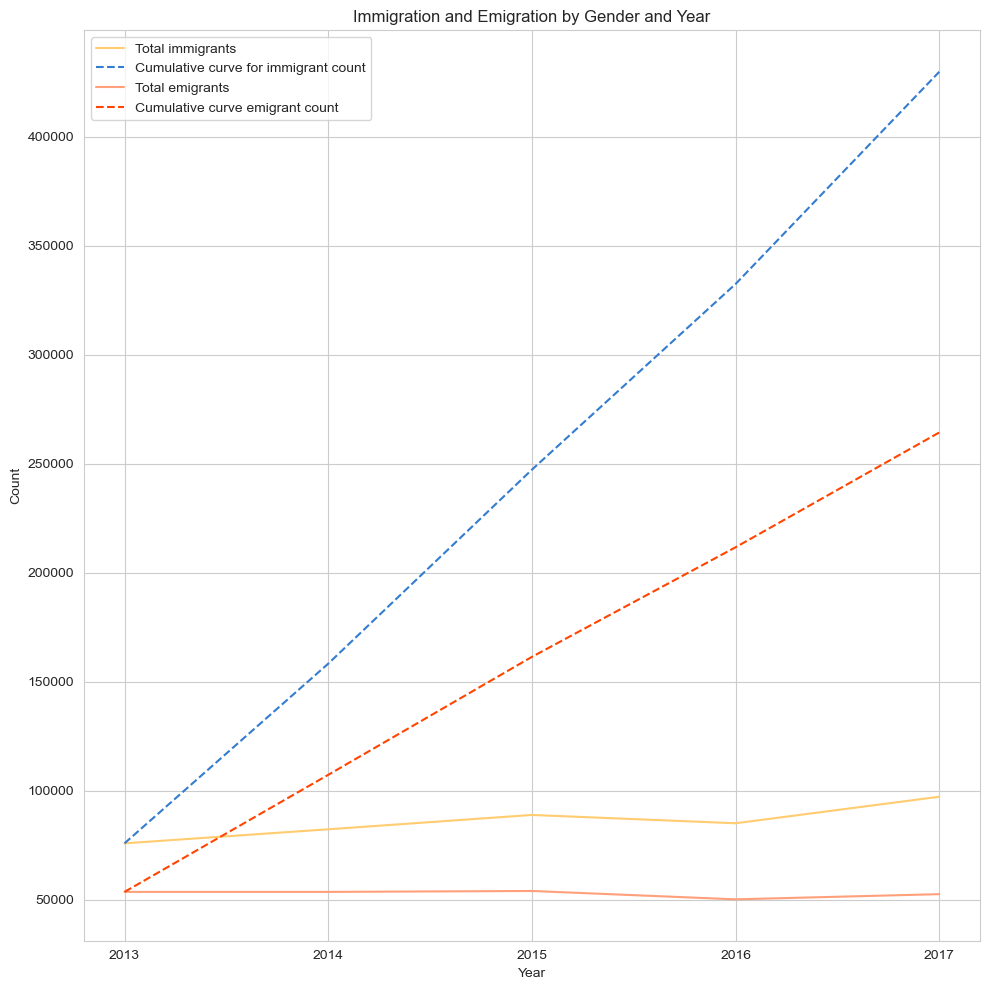

In [37]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 10))
years = [year for year in range(2013, 2018)]

# Calculate the total immigrants and emigrants per year
total_immigrants_per_year = [a + b for a, b in zip(immigrants_male, immigrants_female)]
total_emigrants_per_year = [a + b for a, b in zip(emigrants_male, emigrants_female)]

# Calculate cumulative values for immigrants and emigrants
cumulative_immigrants = np.cumsum(total_immigrants_per_year)
cumulative_emigrants = np.cumsum(total_emigrants_per_year)

# Plot total immigrants and cumulative curve for immigrants
plt.plot(years, total_immigrants_per_year, label='Total immigrants', color='#FFCC70')
plt.plot(years, cumulative_immigrants, label='Cumulative curve for immigrant count', color='#337CCF', linestyle = '--')

# Plot total emigrants and cumulative curve for emigrants
plt.plot(years, total_emigrants_per_year, label='Total emigrants', color='#FFA07A')
plt.plot(years, cumulative_emigrants, label='Cumulative curve emigrant count', color='#FF4500', linestyle = '--')

# Set the x-axis labels
plt.xticks(years)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Immigration and Emigration by Gender and Year')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



- Transportation Accessibility for Immigrants and Emigrants:

1. How accessible is public transportation, including Uber, for immigrants and emigrants in different neighborhoods of Barcelona?
2. Are there specific neighborhoods with high immigrant populations that face transportation challenges?
3. What are the transportation preferences of immigrants and emigrants, and how can Uber tailor its services to meet their needs?

- Language and Cultural Inclusion:

4. How does language proficiency affect immigrants' and emigrants' ability to use transportation services like Uber?
5. Can Uber provide language-specific options or support for users who may not be proficient in the local language?
6. How can Uber's app and communication be more inclusive of diverse cultures and languages?

- Safety and Inclusion:

1. Are immigrants and emigrants more vulnerable to safety concerns when using transportation services?
2. What safety features can Uber implement to make immigrants and emigrants feel more secure while using the platform?
3. How can Uber ensure that its drivers are culturally sensitive and respectful to passengers from diverse backgrounds?

- Affordability and Economic Inclusion:

1. Are immigrants and emigrants facing financial challenges when using transportation services?
2. Can Uber introduce special pricing or discounts to make its services more affordable for these groups?
3. How can Uber support driver-partners from immigrant and emigrant backgrounds to improve their economic inclusion?